<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Types of Flower Data)

The dataset contains the information of the three different species of the iris flower. The dataset contains values of four features (sepal length, sepal width, petal length, and petal width) of each flower and the species of iris.

Attribute Information:

**sepal length:** Sepal length of a flower in cm

**sepal width:** Sepal width of a flower in cm

**petal length:** Petal length of a flower in cm

**petal width:** Petal width of a flower in cm

**class:** Species of the iris flower

#### Import the required libraries

In [9]:
# Import the Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Visualizing Charts.
plt.rcParams['figure.figsize']=[15,6]

from IPython.display import display, HTML                                             ## Increasing width of notebook.
display(HTML("<style>.container { width:95% !important; }</style>"))

from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [5]:
sc = StandardScaler()
mm = MinMaxScaler()

#### Load the flower_types dataset and print the first five observations

In [6]:
flower = pd.read_csv('flower_types.csv')
flower.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Create two dummy variables for the unique categories of flower species</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
pd.get_dummies(flower['class'],drop_first=True)

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,0,1
146,0,1
147,0,1
148,0,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Count the flowers whose sepal width is not known </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
flower.loc[flower['sepal width'].isnull()]

# Gives an empty data set as there are no non null values

,sepal length,sepal width,petal length,petal width,class


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Is the variable 'sepal length' skewed? If yes, suggest the appropriate transformation to reduce the skewness
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

0.3149109566369728


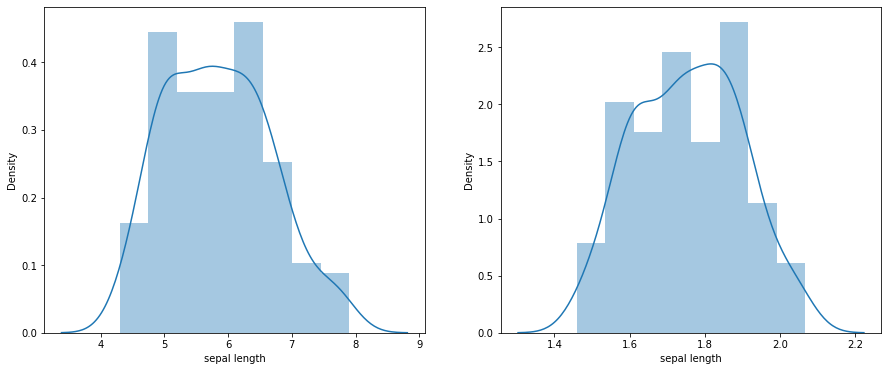

0.043593975574027555


In [12]:
plt.subplot(1,2,1)
sns.distplot(flower['sepal length'])

print(flower['sepal length'].skew())
y=np.log(flower['sepal length'])
plt.subplot(1,2,2)
sns.distplot(y)
plt.show()
print(y.skew())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Is it appropriate to perform the frequency encoding on flower species? Give a suitable reason for your response
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
flower['class'].value_counts(normalize=True)

# As there are only 3 types in flower species and their frequency count is same we need to apply one hot encoding

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: class, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does the petal width range from zero to one? If not, transform the values such that they lie between 0 and 1
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
flower['petal width']=mm.fit_transform(pd.DataFrame(flower['petal width']))
flower

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.041667,setosa
1,4.9,3.0,1.4,0.041667,setosa
2,4.7,3.2,1.3,0.041667,setosa
3,4.6,3.1,1.5,0.041667,setosa
4,5.0,3.6,1.4,0.041667,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,0.916667,virginica
146,6.3,2.5,5.0,0.750000,virginica
147,6.5,3.0,5.2,0.791667,virginica
148,6.2,3.4,5.4,0.916667,virginica


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Construct a boolean matrix such that it returns 'True' for correlation greater than 0.8</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
dataobj=flower.corr()
l1=dataobj.values
l2=np.eye(4)

for i in range(0,4):
    for j in range(0,4):
        if l1[i][j]>0.8:
            l2[i][j]=1
        else:
            l2[i][j]=0
l2            

array([[1., 0., 1., 1.],
       [0., 1., 0., 0.],
       [1., 0., 1., 1.],
       [1., 0., 1., 1.]])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Find the probability that the sepal length of a flower is less than 6 cm using a plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
flower.loc[flower['sepal length']<6].shape[0]/flower.shape[0]

0.5533333333333333

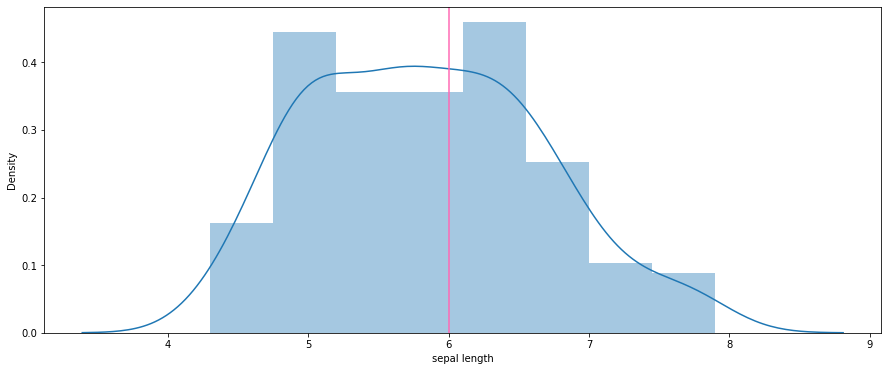

In [18]:
sns.distplot(flower['sepal length'])
plt.axvline(6,color='hotpink')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Label the class of each flower with the integer values from 0 to 2</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
mapped={'setosa':0, 'versicolor':1, 'virginica':2}

In [20]:
flower['flower label']=flower['class'].map(mapped)
flower

,sepal length,sepal width,petal length,petal width,class,flower label
0,5.1,3.5,1.4,0.041667,setosa,0
1,4.9,3.0,1.4,0.041667,setosa,0
2,4.7,3.2,1.3,0.041667,setosa,0
3,4.6,3.1,1.5,0.041667,setosa,0
4,5.0,3.6,1.4,0.041667,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,0.916667,virginica,2
146,6.3,2.5,5.0,0.750000,virginica,2
147,6.5,3.0,5.2,0.791667,virginica,2
148,6.2,3.4,5.4,0.916667,virginica,2


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. What is the relationship between petal length and petal width for different flower species?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

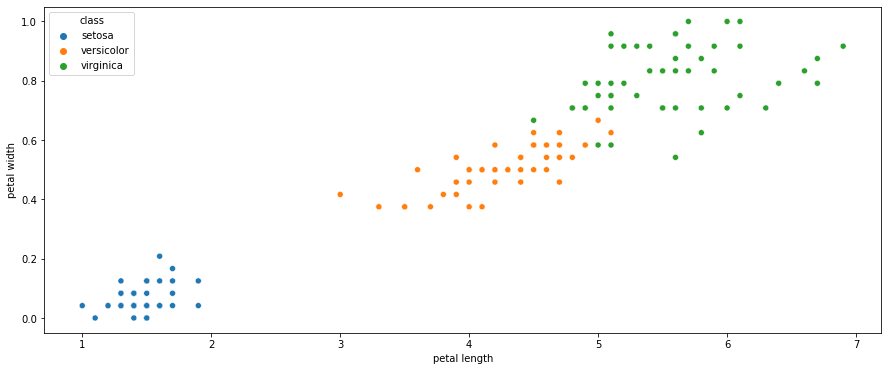

In [22]:
sns.scatterplot(x=flower['petal length'],y=flower['petal width'],hue=flower['class'])
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Compare the sepal length of the three flower species
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

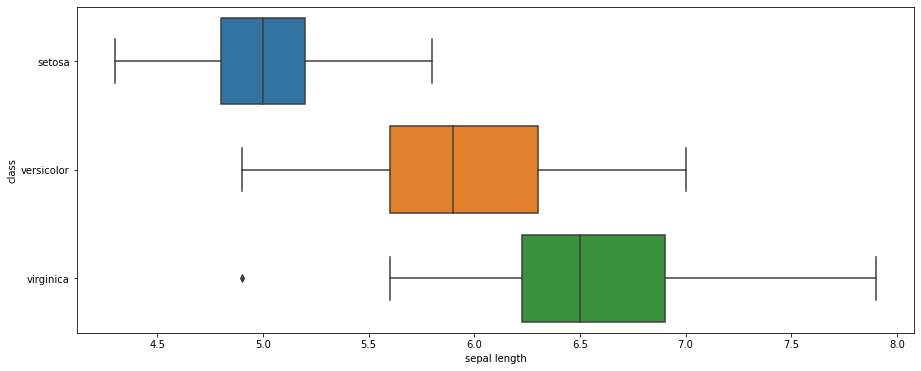

In [23]:
sns.boxplot(x=flower['sepal length'],y=flower['class'])
plt.show()